In [1]:
import os
from pathlib import Path

def root_dir(marker="EXPLib"):
    cwd = Path.cwd()
    # if cwd already contains the marker
    if (cwd / marker).is_dir():
        return cwd
    # otherwise walk up the parents
    for p in cwd.parents:
        if (p / marker).is_dir():
            return p
    raise FileNotFoundError(f"Root marker '{marker}' not found")

os.chdir(root_dir())
#print(os.getcwd())

In [9]:
import torch
import torchvision
from EXPLib.xai_library.model_explainers.shap.shap_utils import _make_detection_wrapper, compute_shap, load_model, plot_shap

In [13]:
weight_path = './EXPLib/dl_component/CNN/Object_Detectors/toy_model_v1/aikonet_toymodelv1_ssdlite.pth'
img_path = './EXPLib/datasets/Camera/toy_model_v1_inference/dev/images/rgb_0000079.png'
model_name = 'ssdlite320_mobilenet_v3_large'
num_classes = 2
im_size = 320
NUM_SEGMENTS = 50

device = 'cuda' if torch.cuda.is_available() else 'cpu' 

In [ ]:
toymodel = load_model(model_name, weight_path, device)
detection_fn = _make_detection_wrapper(toymodel, device)

In [14]:
shap_map, img_np = compute_shap(
    img_path,
    detection_fn,
    num_segments=NUM_SEGMENTS,
)


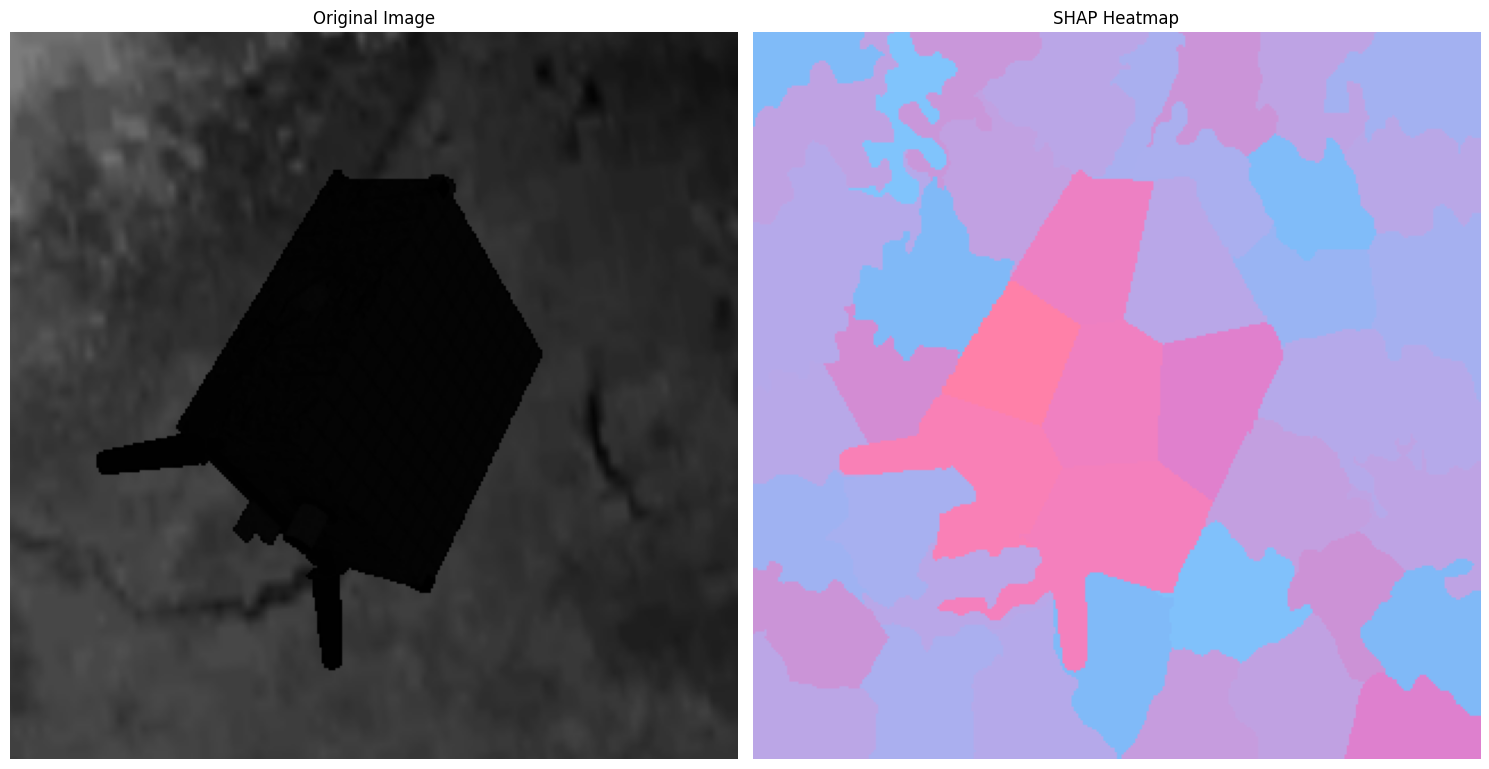

In [15]:
plot_shap(img_np, shap_map)